In [9]:
from pathlib import Path
from PIL import Image
import dicom2jpg
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## GLOB GLOB

In [10]:
# GET ONLY STR
# JUST TO GRAB NAMES OF THE FILE


test_img = "../data_/sample_1_go/*"

img_glob = glob.glob('*.dcm', root_dir=test_img)

print(img_glob)


[]


In [11]:
# USING CUSTOM API SERVICE

data = nbia.getSeries(collection = "CBIS-DDSM")

print(len(data), 'Series returned')

# TO RETURN DATAFRAME

# feed series_data to our downloadSampleSeries function
df = nbia.downloadSeries(data, number = 3, format = "df")
display(df)


# WITH MANIFEST

# download manifest file from RIDER Breast MRI page
manifest = requests.get("https://wiki.cancerimagingarchive.net/download/attachments/22512757/doiJNLP-Fo0H1NtD.tcia?version=1&modificationDate=1534787017928&api=v2")
with open('RIDER_Breast_MRI.tcia', 'wb') as f:
    f.write(manifest.content)

df = nbia.downloadSeries("RIDER_Breast_MRI.tcia", input_type = "manifest", number = 3, format = "df")
display(df)


general_path = "../data_/sample_1_go/"

# Image Test
image_1_dcm = "../data_/sample_1_go/Calc-Test_P_00038_LEFT_CC_1/08-29-2017-DDSM-NA-94942/1.000000-ROI mask images-18515/1-1.dcm"
image_2_dcm = "../data_/sample_1_go/Calc-Test_P_00038_LEFT_CC_1/08-29-2017-DDSM-NA-94942/1.000000-ROI mask images-18515/1-2.dcm"

dir_sample_1_go_jpeg = "../data_/sample_1_go_png"

# CONVERT SINGLE DICOM FILE:



dicom2jpg.dicom2png(general_path, target_root=dir_sample_1_go_jpeg)

NameError: name 'nbia' is not defined

In [ ]:
from tcia_utils import nbia
import dicom2jpg

#manifest = "../data/CBIS-DDSM-All-doiJNLP-zzWs5zfZ.tcia"

# converts manifest to list of UIDs
#uids = nbia.manifestToList(manifest)

def download_and_preprocess():

    data = "../data/data_raw/"
    dir_data_processed = "../data_processed/"
    manifest = "../data/CBIS-DDSM-All-doiJNLP-zzWs5zfZ.tcia"

    # converts manifest to list of UIDs
    uids = nbia.manifestToList(manifest)

    buckt_img = 0
    for pict_dcm in uids:
        for i in range(buckt_img, buckt_img+10):
            pictures = nbia.downloadSeries('../data/CBIS-DDSM-All-doiJNLP-zzWs5zfZ.tcia', input_type = "manifest", number=buckt_img, format = "df",path=data)
            dicom2jpg.dicom2jpg(data, target_root=dir_data_processed)
            buckt_img = buckt_img+10

download_and_preprocess()


2024-03-05 14:23:53,251:INFO:Removing headers from TCIA mainfest.
2024-03-05 14:23:53,254:INFO:Returning 6775 Series Instance UIDs (scans) as a list.
2024-03-05 14:23:53,256:INFO:Removing headers from TCIA mainfest.
2024-03-05 14:23:53,259:INFO:Returning 6775 Series Instance UIDs (scans) as a list.


KeyboardInterrupt: 

In [ ]:
data = "../data/data_raw/"
dir_data_processed = "../data_processed/"



dicom2jpg.dicom2jpg(data, target_root=dir_data_processed)

OSError: File or folder '../data/data_raw' does not exist

In [20]:
data = "../mammo_analysis/data/train.csv"

df = pd.read_csv(data).copy()

df

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


In [21]:
df.shape

(54706, 14)

In [23]:
data_processed_path = "../data/data_processed/"

list_img_name = os.listdir(data_processed_path)

list_img_name

FileNotFoundError: [Errno 2] No such file or directory: '../data/data_processed/'

In [24]:
nvelle_list = []
for i in list_img_name:
    nvelle_list.append(i.replace(".jpg", ""))

nvelle_list

NameError: name 'list_img_name' is not defined

In [25]:
patient_cancer = df[df["cancer"] == 1]

patient_cancer

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
87,1,10130,388811999,L,MLO,71.0,1,1,1,0.0,0,B,49,False
88,1,10130,613462606,L,CC,71.0,1,1,1,0.0,0,B,49,False
89,1,10130,1360338805,L,CC,71.0,1,1,1,0.0,0,B,49,False
90,1,10130,1672636630,L,MLO,71.0,1,1,1,0.0,0,B,49,False
190,1,10226,461614796,L,MLO,71.0,1,1,1,0.0,0,C,49,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54485,2,9707,1900919592,R,MLO,56.0,1,1,1,NaN,0,NaN,21,False
54593,2,9840,111786935,R,MLO,59.0,1,1,1,NaN,0,NaN,21,False
54594,2,9840,1559360810,R,CC,59.0,1,1,1,NaN,0,NaN,21,False
54595,2,9851,1409270544,L,MLO,58.0,1,1,0,NaN,0,NaN,48,False


In [14]:
img_1 = []

for img_name in nvelle_list:
    for line in patient_cancer['image_id']:
        if img_name == str(line):
            img_1.append(line)
        else:
            None
len(img_1)
#patient_1_cancer = pd.DataFrame(img_1[0])
#patient_1_cancer

NameError: name 'nvelle_list' is not defined

In [ ]:
img_1

[343058323,
 730395278,
 1621626040,
 1531879119,
 981350543,
 189362032,
 1490758028,
 1005049159,
 393941516,
 338330540,
 1559332263,
 1044828729,
 2090715578,
 2018825992,
 159974570,
 276588619,
 40744983,
 404195349,
 1856057994,
 1326732476,
 1803952236,
 1593856707,
 352547246,
 1942815129,
 1869230850,
 1269931914,
 1850429460,
 76321767,
 773597682,
 806916891,
 1609298443,
 1211304263,
 1811195939,
 2075900290,
 1923583324,
 1475901500,
 748167281]

In [13]:
df_cancer = pd.DataFrame(img_1)
csv_cancer = df_cancer.to_csv("cancer_sample_csv", index=False)


NameError: name 'img_1' is not defined

In [ ]:
df

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


In [ ]:

df[df['image_id'] == img_1]

ValueError: ('Lengths must match to compare', (54706,), (37,))

In [ ]:
df

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


In [ ]:
df.drop_duplicates()

df

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


In [ ]:
df.describe()


,site_id,patient_id,image_id,age,cancer,biopsy,invasive,BIRADS,implant,machine_id
count,54706.000000,54706.000000,5.470600e+04,54669.000000,54706.000000,54706.000000,54706.000000,26286.000000,54706.000000,54706.000000
mean,1.460407,32698.865262,1.079386e+09,58.543928,0.021168,0.054272,0.014953,0.772350,0.026999,54.618378
std,0.498434,18893.861534,6.183269e+08,10.050884,0.143944,0.226556,0.121365,0.590062,0.162081,44.784800
min,1.000000,5.000000,6.849100e+04,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,16481.000000,5.458153e+08,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
50%,1.000000,32432.000000,1.082689e+09,59.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
75%,2.000000,48999.000000,1.613228e+09,66.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
max,2.000000,65534.000000,2.147472e+09,89.000000,1.000000,1.000000,1.000000,2.000000,1.000000,216.000000


/home/pierrepal/.pyenv/versions/3.10.6/envs/mammo-analysis/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


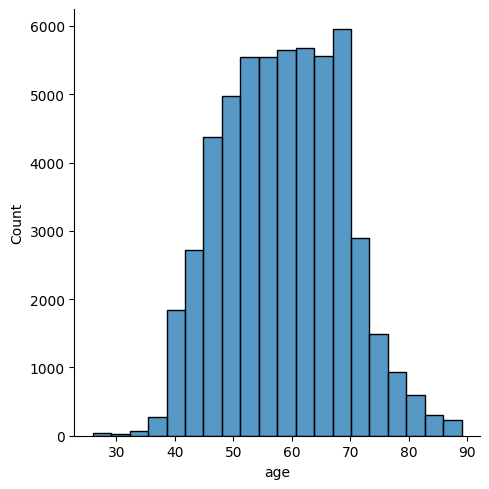

In [ ]:
import seaborn as sns

sns.displot(df['age'], bins=20)

In [ ]:
df['cancer'].value_counts()

cancer
0    53548
1     1158
Name: count, dtype: int64

In [ ]:
df

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


In [ ]:
data_implant = df[df['implant'] == 1]

data_implant

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
793,1,10851,808241086,L,MLO,76.0,0,0,0,0.0,1,B,49,True
794,1,10851,1120382217,L,CC,76.0,0,0,0,0.0,1,B,49,True
795,1,10851,1285202241,L,MLO,76.0,0,0,0,0.0,1,B,49,True
796,1,10851,1441952045,L,MLO,76.0,0,0,0,0.0,1,B,49,True
797,1,10851,1547415696,L,CC,76.0,0,0,0,0.0,1,B,49,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54574,1,9814,443154885,L,MLO,61.0,0,0,0,1.0,1,A,49,False
54575,1,9814,1064110749,L,CC,61.0,0,0,0,1.0,1,A,49,False
54576,1,9814,12369795,R,MLO,61.0,0,0,0,1.0,1,A,49,False
54577,1,9814,1149002441,R,CC,61.0,0,0,0,1.0,1,A,49,False


In [ ]:
new_df = data_implant.groupby('image_id')

In [ ]:
data_cancer = df['cancer']

data_cancer.value_counts()

cancer
0    53548
1     1158
Name: count, dtype: int64

In [ ]:
!pip install mlflow

import mlflow

mlflow.set_tracking_uri("https://mlflow.lewagon.ai")
mlflow.set_experiment(experiment_name="wagoncab taxifare")
with mlflow.start_run():

    params = dict(batch_size=256, row_count=100_000)
    metrics = dict(rmse=0.456)

    mlflow.log_params(params)
    mlflow.log_metrics(metrics)

    mlflow.tensorflow.log_model(model=model,
                                artifact_path="model",
                                registered_model_name="taxifare_model"
    )

In [ ]:
os.path.dirname(CUR_DIR)

'/home/pierrepal/code/Lalucarne51/mammo-analysis'

In [ ]:
# Imports
from google.cloud import storage
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Variables

config = tf.compat.v1.ConfigProto(
        device_count = {'GPU': 0}
    )
sess = tf.compat.v1.Session(config=config)

CUR_DIR = os.getcwd()
PROJECT_DIR = os.path.join(os.path.dirname(CUR_DIR), 'mammo_analysis')
DATA_DIR = os.path.join(PROJECT_DIR, "data")

RAW_DATA = os.path.join(DATA_DIR, "raw_data")
DATA_CLEAN = os.path.join(DATA_DIR, "data_clean")

BUCKET_NAME = "mammo_data"
METADATA = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))

BATCH_SIZE = 64
EPOCHS = 5


# Upload files to GCP bucket storage
def upload_files_to_gcp(bucket_name: str, source_directory: str):
    """
    Uploads all files from a local directory to a GCP bucket.

    Parameters:
    - bucket_name: Name of the GCP bucket.
    - source_directory: Local directory from which to upload files.

    Return:
    - None
    """

    # Initialize GCP Storage client
    client = storage.Client()
    bucket = client.bucket(bucket_name)

    # Ensure the destination blob folder path ends with '/'
    if destination_blob_folder and not destination_blob_folder.endswith("/"):
        destination_blob_folder += "/"

    # Walk through the source directory
    for root, dirs, files in os.walk(source_directory):
        for filename in files:
            # Construct the local file path
            local_path = os.path.join(root, filename)
            # print(local_path)

            # Construct the destination path in the bucket
            if destination_blob_folder:
                relative_path = os.path.relpath(local_path, source_directory)
                blob_path = destination_blob_folder + relative_path
            else:
                blob_path = filename

            # Upload the file
            blob = bucket.blob(blob_path)
            blob.upload_from_filename(local_path)
            print(f'Uploaded {local_path} to "gs://{bucket_name}/{blob_path}"')


def create_and_upload_merged_csv(
    bucket_name: str,
    metadata_csv,
    output_csv_name: str = "ready_to_train.csv",
    file_extension: str = ".jpg",
):
    """
    Fetches files with a specific extension from a GCP bucket, merges their paths with another DataFrame,
    and uploads the merged DataFrame as a CSV to the bucket.

    Parameters:
    - bucket_name: The name of the GCP bucket.
    - metadata_csv: The DataFrame to merge with. It should have columns 'id' and 'label'.
    - output_csv_name: The name of the output CSV file to be stored in the bucket.
    - file_extension: The file extension to filter by. Default is '.jpg'.

    Return:
    - None
    """

    # Initialize a GCP Storage client
    client = storage.Client()
    bucket = client.bucket(bucket_name)

    # Create a list to hold file information
    files_info = []

    # Iterate over the files in the bucket, filtering by the specified extension
    for blob in bucket.list_blobs():
        if blob.name.lower().endswith(file_extension):
            file_id = blob.name.rsplit(".", 1)[0]  # Extract the file ID
            files_info.append(
                {
                    "image_id": np.int64(int(file_id)),
                    "path": f"gs://{bucket_name}/{blob.name}",
                }
            )

    # Create a DataFrame from the file information
    df_files = pd.DataFrame(files_info)

    # Select only the columnes we need
    metadata_csv = metadata_csv[["image_id", "cancer"]]

    # Merge the DataFrames on the 'id' column
    merged_df = pd.merge(
        df_files, metadata_csv, on="image_id", how="inner"
    )  # Use for the final CSV
    merged_df = pd.merge(
        df_files, metadata_csv, on="image_id", how="left"
    )  # Use for the tests

    # Convert the DataFrame to a CSV string
    csv_string = merged_df.to_csv(index=False)

    # Save the CSV string to a file in the bucket
    blob = bucket.blob(output_csv_name)
    blob.upload_from_string(csv_string, "text/csv")
    print(f'CSV file "{output_csv_name}" uploaded to bucket "{bucket_name}".')


#####
# Dataset Creation
#####
# Load and process images
def load_and_process_image(file_path: str, label):
    """
    Loads and processes an image file for model training.

    Parameters:
    - file_path: The path to the image file.
    - label: The label associated with the image file.

    Returns:
    - Tuple containing the processed image and its label.
    """

    img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(img, channels=1)
    img = tf.image.resize(img, [128, 128])  # Resize images
    img = img / 255.0  # Normalize to [0,1]
    return img, label


def create_dataset(input: str = "local"):
    """
    Creates a dataset for model training.

    Parameters:
    - input: Specifies the source of the dataset, 'local' or 'cloud'.

    Returns:
    - TensorFlow dataset object.
    """
    # local or cloud
    # Load the dataset
    if input == "local":
        df = pd.read_csv(os.path.join(DATA_DIR, 'ready_to_train.csv'))
    if input == "cloud":
        df = pd.read_csv("gs://test_boobies/ready_to_train.csv")

    # Create a TensorFlow dataset
    paths = df["path"].values
    labels = df["cancer"].values

    labels = tf.cast(labels, dtype=tf.int32)

    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(load_and_process_image)

    return dataset


#####
# Model
#####
def initialize_model():
    """
    Initializes a sequential model for binary classification.

    Returns:
    - TensorFlow Sequential model.
    """
    model = Sequential()
    model.add(Conv2D(16, (4, 4), input_shape=(128, 128, 1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=10, activation="relu"))
    model.add(Dense(units=1, activation="sigmoid"))

    return model


#####
# Callback
#####
class custom_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs["accuracy"] >= 0.97:
            self.model.stop_training = True


custom_callback = custom_callback()

#####
# Optimizer
#####
optimizer = tf.keras.optimizers.legacy.Adam(
    learning_rate=0.000001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adam"
)

#####
# Loss Fn
#####
lossfn = tf.keras.losses.BinaryCrossentropy(
    from_logits=False, label_smoothing=0.0, axis=-1, name="binary_crossentropy"
)


#####
# Workflow
#####
def initialize_and_compile_model(optimizer, lossfn):
    """
    Initializes the model, compiles it with the specified optimizer and loss function,
    and prints the model summary.

    Parameters:
    - optimizer: The optimizer to use for training the model.
    - lossfn: The loss function to use for training.

    Returns:
    - Compiled TensorFlow model.
    """
    print("\nInit the model :")
    model = initialize_model()
    model.compile(optimizer=optimizer, loss=lossfn, metrics=["accuracy"])
    return model


def batch_dataset(dataset, batch_size: int):
    """
    Batches the dataset with the specified batch size.

    Parameters:
    - dataset: The dataset to batch.
    - batch_size: The size of each batch.

    Returns:
    - Batched dataset.
    """
    return dataset.batch(batch_size)


def split_dataset(batched_dataset, ratio: float = 0.8):
    """
    Splits the batched dataset into training and testing datasets.

    Parameters:
    - batched_dataset: The batched dataset to split.

    Returns:
    - Tuple containing the training and testing datasets.
    """
    size = int(len(batched_dataset) * ratio)

    train = batched_dataset.take(size)
    test = batched_dataset.skip(size)

    return train, test


def train_model(model, train, test, epochs: int, callbacks: list):
    """
    Trains the model on the training dataset and validates it on the testing dataset.

    Parameters:
    - model: The model to train.
    - train: The training dataset.
    - test: The testing dataset.
    - epochs: The number of epochs to train for.
    - callbacks: A list of callbacks to use during training.

    Returns:
    - History object resulting from model training.
    """
    history = model.fit(
        train,
        validation_data=test,
        epochs=epochs,
        callbacks=callbacks,
    )
    return history

"""
if __name__ == "__main__":
    # Upload alls jpeg to create the test
    # upload_files_to_gcp(BUCKET_NAME, RAW_DATA)

    # Walk inside the bucket & create the metadata
    # create_and_upload_merged_csv(BUCKET_NAME, METADATA)

    print("==== Starting Workflow ====")

    # Step 1: Create the Dataset
    print("\n=== Step 1: Creating the Dataset ===")
    dataset = create_dataset()
    print("Dataset created successfully.")
    print(dataset)

    # Step 2: Initialize and Compile the Model
    print("\n=== Step 2: Initializing and Compiling the Model ===")
    model = initialize_and_compile_model(optimizer, lossfn)
    print("Model initialized and compiled successfully.")

    # Step 3: Batch the Dataset
    print("\n=== Step 3: Batching the Dataset ===")
    batched_dataset = batch_dataset(dataset, BATCH_SIZE)
    print(f"Dataset batched with batch size {BATCH_SIZE}.")

    # Step 4: Create Train/Test Split
    print("\n=== Step 4: Creating Train/Test Split ===")
    train, test = split_dataset(batched_dataset, 0.8)
    print(
        f"Train/Test split created. Train size: {len(train)}, Test size: {len(test)}."
    )

    # Step 5: Train the Model
    print("\n=== Step 5: Training the Model ===")
    history = train_model(model, train, test, epochs=5, callbacks=[custom_callback])
    print("Model training complete.")

    # Conclusion
    print("\n==== Workflow Completed Successfully ====")

    """

2024-03-11 16:09:46.435507: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-11 16:09:46.435575: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


'\nif __name__ == "__main__":\n    # Upload alls jpeg to create the test\n    # upload_files_to_gcp(BUCKET_NAME, RAW_DATA)\n\n    # Walk inside the bucket & create the metadata\n    # create_and_upload_merged_csv(BUCKET_NAME, METADATA)\n\n    print("==== Starting Workflow ====")\n\n    # Step 1: Create the Dataset\n    print("\n=== Step 1: Creating the Dataset ===")\n    dataset = create_dataset()\n    print("Dataset created successfully.")\n    print(dataset)\n\n    # Step 2: Initialize and Compile the Model\n    print("\n=== Step 2: Initializing and Compiling the Model ===")\n    model = initialize_and_compile_model(optimizer, lossfn)\n    print("Model initialized and compiled successfully.")\n\n    # Step 3: Batch the Dataset\n    print("\n=== Step 3: Batching the Dataset ===")\n    batched_dataset = batch_dataset(dataset, BATCH_SIZE)\n    print(f"Dataset batched with batch size {BATCH_SIZE}.")\n\n    # Step 4: Create Train/Test Split\n    print("\n=== Step 4: Creating Train/Test Sp

In [12]:
print("==== Starting Workflow ====")

# Step 1: Create the Dataset
print("\n=== Step 1: Creating the Dataset ===")
dataset = create_dataset()
print("Dataset created successfully.")
print(dataset)

# Step 2: Initialize and Compile the Model
print("\n=== Step 2: Initializing and Compiling the Model ===")
model = initialize_and_compile_model(optimizer, lossfn)
print("Model initialized and compiled successfully.")

# Step 3: Batch the Dataset
print("\n=== Step 3: Batching the Dataset ===")
batched_dataset = batch_dataset(dataset, BATCH_SIZE)
print(f"Dataset batched with batch size {BATCH_SIZE}.")

# Step 4: Create Train/Test Split
print("\n=== Step 4: Creating Train/Test Split ===")
train, test = split_dataset(batched_dataset, 0.8)
print(
    f"Train/Test split created. Train size: {len(train)}, Test size: {len(test)}."
)

# Step 5: Train the Model
print("\n=== Step 5: Training the Model ===")
history = train_model(model, train, test, epochs=5, callbacks=[custom_callback])
print("Model training complete.")

# Conclusion
print("\n==== Workflow Completed Successfully ====")

==== Starting Workflow ====

=== Step 1: Creating the Dataset ===
Dataset created successfully.
<_MapDataset element_spec=(TensorSpec(shape=(128, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

=== Step 2: Initializing and Compiling the Model ===

Init the model :
Model initialized and compiled successfully.

=== Step 3: Batching the Dataset ===
Dataset batched with batch size 64.

=== Step 4: Creating Train/Test Split ===
Train/Test split created. Train size: 684, Test size: 171.

=== Step 5: Training the Model ===
Epoch 1/5
 93/684 [===>..........................] - ETA: 1:24:50 - loss: 0.6936 - accuracy: 0.4249

KeyboardInterrupt: 